In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras

## Loading and Baseline Training

In [2]:
# Load data
train_data = pd.read_csv('data/sign_mnist_train.csv')
test_data = pd.read_csv('data/sign_mnist_test.csv')

# Explore data
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel1015,pixel1016,pixel1017,pixel1018,pixel1019,pixel1020,pixel1021,pixel1022,pixel1023,pixel1024
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,157,157,157,157,157,158,158,...,149,163,175,175,175,175,175,149,149,149
2,2,187,188,188,188,188,188,188,188,188,...,202,201,200,199,199,199,198,195,195,195
3,2,211,211,212,212,212,212,212,212,211,...,235,234,233,231,230,229,229,229,229,163
4,13,164,167,170,172,176,179,180,184,185,...,133,163,163,163,164,179,179,179,179,179


In [3]:
# Preprocess data
X_train = train_data.drop('label', axis=1).values
y_train = train_data['label'].values
X_test = test_data.drop('label', axis=1).values
y_test = test_data['label'].values

# Check the shape of the data
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (27455, 1024)
y_train shape: (27455,)
X_test shape: (7172, 1024)
y_test shape: (7172,)


In [4]:
# I found on the internet the actual size of the ASL dataset, (as 1024x1 would make no sense for displaying as well as for CNN)
image_size = 32 * 32

# Verify the size
assert X_train.shape[1] == image_size, "Unexpected image size in the training set"
assert X_test.shape[1] == image_size, "Unexpected image size in the test set"

# Normalize pixel values
min_maxer = MinMaxScaler(feature_range=(0,1))
X_train = min_maxer.fit_transform(X_train)
X_test = min_maxer.transform(X_test)

# Reshape data for CNN model
X_train = X_train.reshape(-1, 32, 32)
X_test = X_test.reshape(-1, 32, 32)

# Split data into training and validation sets
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.4, random_state=42)

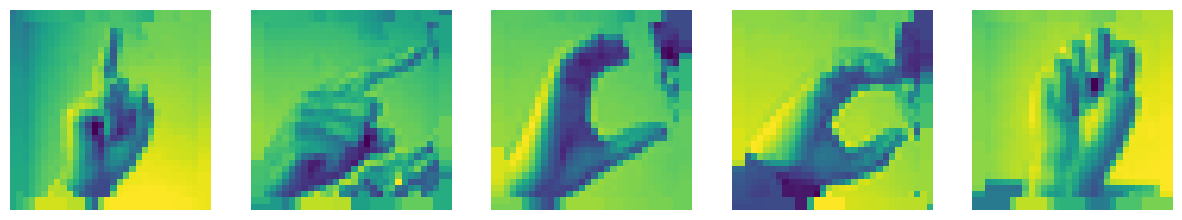

In [5]:
plt.figure(figsize=(15, 3))

for i in range(5):
    plt.subplot(1, 5, i + 1) 
    plt.matshow(X_train[i], fignum=False) 
    plt.axis('off')

plt.show()

In [ ]:
# Baseline model (simple DNN)
baseline = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 1)),  # Shape of the image
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(26, activation='softmax')  # 26 Letters in ASL
])
baseline.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
filters = 32
kernel_size = 2

baseline_cnn = keras.Sequential([
        keras.layers.Conv2D(filters, (kernel_size, kernel_size), activation='relu', input_shape=(32, 32, 1)),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Conv2D(filters*2, (kernel_size, kernel_size), activation='relu'),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(26, activation='softmax') 
    ])

baseline_cnn.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
history_dnn = baseline.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_val, y_val))

858/858 [==============================] - 1s 830us/step - loss: 0.8434 - accuracy: 0.7159 - val_loss: 1.4223 - val_accuracy: 0.5918
Epoch 7/20
858/858 [==============================] - 1s 859us/step - loss: 0.7401 - accuracy: 0.7538 - val_loss: 1.4830 - val_accuracy: 0.5497
Epoch 8/20
858/858 [==============================] - 1s 787us/step - loss: 0.6490 - accuracy: 0.7800 - val_loss: 1.2454 - val_accuracy: 0.5936
Epoch 9/20
858/858 [==============================] - 1s 816us/step - loss: 0.5757 - accuracy: 0.8043 - val_loss: 1.2171 - val_accuracy: 0.6424
Epoch 10/20
858/858 [==============================] - 1s 800us/step - loss: 0.5039 - accuracy: 0.8306 - val_loss: 1.3456 - val_accuracy: 0.6344
Epoch 11/20
858/858 [==============================] - 1s 815us/step - loss: 0.4468 - accuracy: 0.8475 - val_loss: 1.2495 - val_accuracy: 0.6605
Epoch 12/20
858/858 [==============================] - 1s 844us/step - loss: 0.3988 - accuracy: 0.8628 - val_loss: 1.2551 - val_accuracy: 0.6476


In [9]:
history_cnn = baseline_cnn.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_val, y_val))

858/858 [==============================] - 1s 1ms/step - loss: 0.0203 - accuracy: 0.9943 - val_loss: 0.4387 - val_accuracy: 0.9055
Epoch 4/20
858/858 [==============================] - 1s 1ms/step - loss: 0.0089 - accuracy: 0.9974 - val_loss: 0.5682 - val_accuracy: 0.9021
Epoch 5/20
858/858 [==============================] - 1s 1ms/step - loss: 0.0047 - accuracy: 0.9988 - val_loss: 0.5368 - val_accuracy: 0.8982
Epoch 6/20
858/858 [==============================] - 1s 1ms/step - loss: 0.0043 - accuracy: 0.9991 - val_loss: 0.6070 - val_accuracy: 0.9143
Epoch 7/20
858/858 [==============================] - 1s 1ms/step - loss: 0.0023 - accuracy: 0.9993 - val_loss: 0.6632 - val_accuracy: 0.8996
Epoch 8/20
858/858 [==============================] - 1s 1ms/step - loss: 8.2657e-04 - accuracy: 0.9998 - val_loss: 1.0434 - val_accuracy: 0.8616
Epoch 9/20
858/858 [==============================] - 1s 1ms/step - loss: 3.6662e-04 - accuracy: 0.9999 - val_loss: 0.6762 - val_accuracy: 0.9160
Epoch 10/

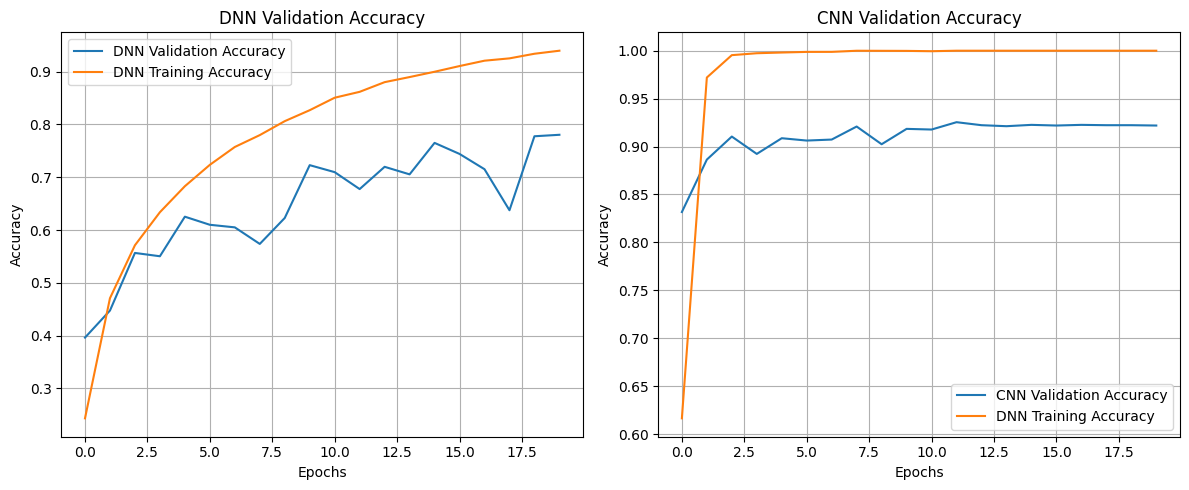

In [28]:
plt.figure(figsize=(12, 5)) 

plt.subplot(1, 2, 1) 
plt.plot(history_dnn.history['val_accuracy'], label='DNN Validation Accuracy')
plt.plot(history_dnn.history['accuracy'], label='DNN Training Accuracy')
plt.title('DNN Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)  
plt.plot(history_cnn.history['val_accuracy'], label='CNN Validation Accuracy')
plt.plot(history_cnn.history['accuracy'], label='DNN Training Accuracy')
plt.title('CNN Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()  
plt.show()

## Optimization

In [10]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import ParameterGrid

# Function to create the baseline model
def create_baseline_model(optimizer='rmsprop', units=64):
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(32, 32, 1)),
        tf.keras.layers.Dense(units, activation='relu'),
        tf.keras.layers.Dense(units, activation='relu'),
        tf.keras.layers.Dense(26, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Function to create the CNN model
def create_baseline_cnn_model(optimizer='rmsprop', filters=32, kernel_size=2):
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(filters, (kernel_size, kernel_size), activation='relu', input_shape=(32, 32, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(filters*2, (kernel_size, kernel_size), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(26, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Define hyperparameter grids
baseline_param_grid = {
    'optimizer': ['rmsprop', 'adam'],
    'units': [32, 64]       # Less units than the baseline because the baseline was overfitting
}

cnn_param_grid = {
    'optimizer': ['rmsprop', 'adam'],
    'filters': [32, 64],
    'kernel_size': [2, 3]
}

# Utility function to train and evaluate the model
def tune_model(create_model_fn, param_grid, X_train, y_train, X_val, y_val):
    best_val_accuracy = 0
    best_model = None
    best_params = None
    
    for params in ParameterGrid(param_grid):
        print(f"Training with params: {params}")
        model = create_model_fn(**params)
        history = model.fit(X_train, y_train, epochs=16, batch_size=16, validation_data=(X_val, y_val), verbose=0)
        val_accuracy = np.max(history.history['val_accuracy'])
        print(f"Validation accuracy: {val_accuracy}")
        
        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            best_model = model
            best_params = params
    
    return best_model, best_params, best_val_accuracy


In [11]:
# Tune baseline model
best_baseline_model, best_baseline_params, best_baseline_accuracy = tune_model(create_baseline_model, baseline_param_grid, X_train, y_train, X_val, y_val)
print(f"Best Baseline Model Params: {best_baseline_params}, Best Accuracy: {best_baseline_accuracy}")

Training with params: {'optimizer': 'rmsprop', 'units': 32}
Validation accuracy: 0.48867201805114746
Training with params: {'optimizer': 'rmsprop', 'units': 64}
Validation accuracy: 0.696061372756958
Training with params: {'optimizer': 'adam', 'units': 32}
Validation accuracy: 0.6786336898803711
Training with params: {'optimizer': 'adam', 'units': 64}
Validation accuracy: 0.7274311780929565
Best Baseline Model Params: {'optimizer': 'adam', 'units': 64}, Best Accuracy: 0.7274311780929565


In [13]:
# Tune CNN model
best_cnn_model, best_cnn_params, best_cnn_accuracy = tune_model(create_baseline_cnn_model, cnn_param_grid, X_train, y_train, X_val, y_val)
print(f"Best CNN Model Params: {best_cnn_params}, Best Accuracy: {best_cnn_accuracy}")

Validation accuracy: 0.9397002458572388
Training with params: {'filters': 32, 'kernel_size': 3, 'optimizer': 'adam'}
Validation accuracy: 0.9484140872955322
Training with params: {'filters': 64, 'kernel_size': 2, 'optimizer': 'rmsprop'}


W0000 00:00:1723667556.727872   28927 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1723667556.728193   28927 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1723667556.728439   28927 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1723667556.728669   28927 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1723667556.729597   28927 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1723667556.730227   28927 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1723667556.730458   28927 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1723667556.730684   28927 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1723667556.730916   28927 gp

Validation accuracy: 0.9323806166648865
Training with params: {'filters': 64, 'kernel_size': 2, 'optimizer': 'adam'}
Validation accuracy: 0.9268037676811218
Training with params: {'filters': 64, 'kernel_size': 3, 'optimizer': 'rmsprop'}


W0000 00:00:1723667609.998776   28922 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1723667609.999064   28922 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1723667609.999277   28922 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1723667609.999477   28922 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1723667609.999717   28922 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1723667609.999920   28922 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1723667610.000124   28922 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1723667610.000379   28922 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1723667610.001548   28922 gp

Validation accuracy: 0.9438828825950623
Training with params: {'filters': 64, 'kernel_size': 3, 'optimizer': 'adam'}
Validation accuracy: 0.9250609874725342
Best CNN Model Params: {'filters': 32, 'kernel_size': 3, 'optimizer': 'adam'}, Best Accuracy: 0.9484140872955322


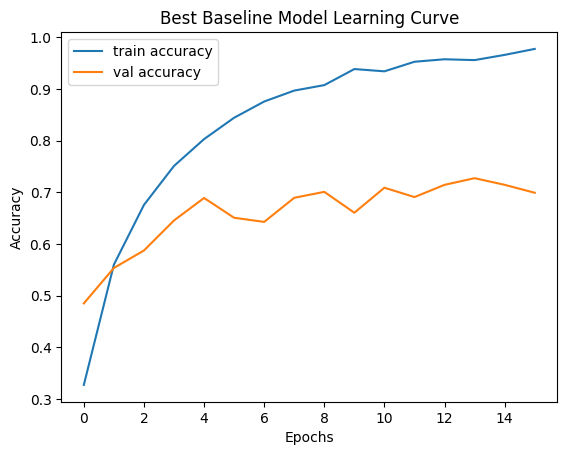

In [12]:
def plot_learning_curve(history, title):
    plt.plot(history.history['accuracy'], label='train accuracy')
    plt.plot(history.history['val_accuracy'], label='val accuracy')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_learning_curve(best_baseline_model.history, "Best Baseline Model Learning Curve")

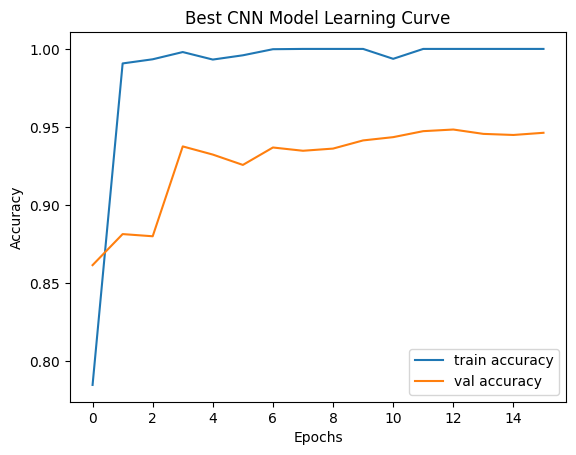

In [14]:
plot_learning_curve(best_cnn_model.history, "Best CNN Model Learning Curve")

## Best Model Selection

In [16]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred_baseline = np.argmax(best_baseline_model.predict(X_test), axis=1)
y_pred_cnn = np.argmax(best_cnn_model.predict(X_test), axis=1)

# Evaluate and display metrics
def evaluate_model(y_true, y_pred, label_names):
    # Calculate the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Accuracy for each letter
    accuracies = cm.diagonal() / cm.sum(axis=1)
    
    # Unbiased median accuracy
    median_accuracy = np.median(accuracies)
    print(f"Unbiased Median Accuracy: {median_accuracy:.4f}")
    
    # Overall mean accuracy
    mean_accuracy = accuracy_score(y_true, y_pred)
    print(f"Overall Mean Accuracy: {mean_accuracy:.4f}")
    
    # Highest and lowest accuracy letters
    highest_acc_idx = np.argmax(accuracies)
    lowest_acc_idx = np.argmin(accuracies)
    
    print(f"Highest Accuracy Letter: {label_names[highest_acc_idx]} with {accuracies[highest_acc_idx]:.4f}")
    print(f"Lowest Accuracy Letter: {label_names[lowest_acc_idx]} with {accuracies[lowest_acc_idx]:.4f}")
    
    # Accuracy for each individual letter
    for i, acc in enumerate(accuracies):
        print(f"Accuracy for {label_names[i]}: {acc:.4f}")
    
    # Identify the most common errors
    errors = []
    for i in range(len(label_names)):
        for j in range(len(label_names)):
            if i != j:
                errors.append((label_names[i], label_names[j], cm[i, j]))
                
    # Sort errors by frequency
    errors = sorted(errors, key=lambda x: x[2], reverse=True)
    
    print("Three Most Common Errors:")
    for i in range(3):
        print(f"{errors[i][0]} misclassified as {errors[i][1]}: {errors[i][2]} occurrences")

# Assuming label_names contains the list of all letters in the dataset
label_names = list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')

135/135 [==============================] - 0s 411us/step


In [17]:
print("Baseline Model Evaluation:")
evaluate_model(y_test, y_pred_baseline, label_names)

Baseline Model Evaluation:
Unbiased Median Accuracy: 0.6733
Overall Mean Accuracy: 0.6746
Highest Accuracy Letter: Q with 0.9796
Lowest Accuracy Letter: R with 0.2674
Accuracy for A: 0.9064
Accuracy for B: 0.7869
Accuracy for C: 0.9239
Accuracy for D: 0.6690
Accuracy for E: 0.9396
Accuracy for F: 0.6776
Accuracy for G: 0.7422
Accuracy for H: 0.8224
Accuracy for I: 0.4556
Accuracy for K: 0.4106
Accuracy for L: 0.5410
Accuracy for M: 0.7957
Accuracy for N: 0.5087
Accuracy for O: 0.8088
Accuracy for P: 0.7580
Accuracy for Q: 0.9796
Accuracy for R: 0.2674
Accuracy for S: 0.4872
Accuracy for T: 0.4218
Accuracy for U: 0.7857
Accuracy for V: 0.5665
Accuracy for W: 0.4032
Accuracy for X: 0.5032
Accuracy for Y: 0.4717
Three Most Common Errors:
V misclassified as W: 42 occurrences
R misclassified as U: 41 occurrences
G misclassified as Q: 39 occurrences


In [18]:
print("\nCNN Model Evaluation:")
evaluate_model(y_test, y_pred_cnn, label_names)


CNN Model Evaluation:
Unbiased Median Accuracy: 0.9346
Overall Mean Accuracy: 0.9247
Highest Accuracy Letter: A with 1.0000
Lowest Accuracy Letter: R with 0.5814
Accuracy for A: 1.0000
Accuracy for B: 1.0000
Accuracy for C: 0.9348
Accuracy for D: 0.9379
Accuracy for E: 1.0000
Accuracy for F: 1.0000
Accuracy for G: 0.9289
Accuracy for H: 0.9344
Accuracy for I: 0.9822
Accuracy for K: 0.9275
Accuracy for L: 1.0000
Accuracy for M: 0.9304
Accuracy for N: 0.6474
Accuracy for O: 0.9118
Accuracy for P: 1.0000
Accuracy for Q: 1.0000
Accuracy for R: 0.5814
Accuracy for S: 0.9038
Accuracy for T: 0.6463
Accuracy for U: 0.8701
Accuracy for V: 1.0000
Accuracy for W: 0.9113
Accuracy for X: 0.9873
Accuracy for Y: 0.8726
Three Most Common Errors:
Y misclassified as S: 27 occurrences
R misclassified as U: 25 occurrences
T misclassified as H: 24 occurrences


The CNN model shows strong performance, with a median accuracy of **93.46%** and the highest accuracy reaching 100% for multiple letters. However, significant misclassification still occurs with certain letters, notably R, N, and T. The baseline model, with a median accuracy of 67.33%, is less reliable but highlights areas for improvement. Refining the CNN by focusing on resolving specific misclassifications (e.g., R misclassified as U) through techniques like data augmentation, hyperparameter tuning, or adding more layers should further boost performance. Achieving near-perfect accuracy with modest optimization seems feasible, especially for critical but currently underperforming letters.